In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
df.groupby('label').describe()

Unnamed: 0                                                              \
           count         mean          std     min      25%     50%      75%   
label                                                                          
FAKE      3164.0  7912.297092  1514.701524  5280.0  6627.75  7904.0  9231.25   
REAL      3171.0  2654.344056  1531.720152     2.0  1317.50  2676.0  3992.50   

                
           max  
label           
FAKE   10557.0  
REAL    5276.0

In [6]:
df['length'] = df['text'].apply(len)

In [7]:
df.head()

,Unnamed: 0,title,text,label,length
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


<AxesSubplot:ylabel='Frequency'>

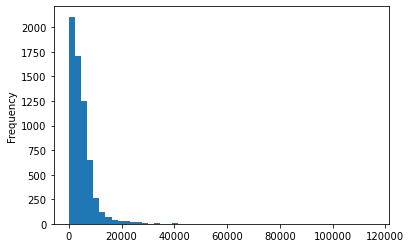

In [8]:
df['length'].plot(kind = 'hist',bins = 50)

In [9]:
df.length.describe()

count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: length, dtype: float64

In [10]:
df[df['length'] == 115372]['text'].iloc[0]

'Why Are So Many People Choosing To Leave The United States Permanently?   August 11th, 2013 \nHave things gotten so bad that it is time to leave the United States for good? That is a question that a lot of Americans are dealing with these days, and an increasing number of them are choosing to leave the country of their birth permanently. Some are doing it for tax reasons, some are doing it because they believe the future is brighter elsewhere, and others are doing it because they are very distressed about the direction that America is heading and they don’t see any hope for a turnaround any time soon. Personally, I have several friends and contacts that regard themselves as “preppers” that have decided that the United States is too far gone to recover. They have moved their families out of the country and they never plan to return. As this nation continues to head down the very troubled road that it is currently on, this trend is probably only going to accelerate even more. \nIn fact,

<Figure size 864x432 with 0 Axes>

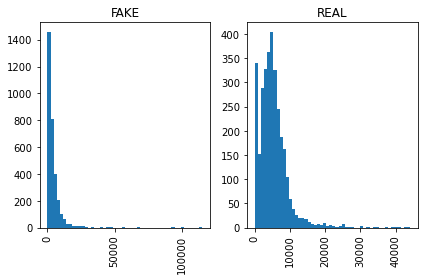

In [11]:
figure = plt.figure(figsize = (12,6))
df.hist(column = 'length',by = 'label',bins = 50)
plt.tight_layout()

In [19]:
import nltk 
nltk.download('stopwords') #Download the necessary datasets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import string

In [21]:
from nltk.corpus import stopwords


In [22]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [word for word in mess if word not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
df.head()

,Unnamed: 0,title,text,label,length
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
 4   length      6335 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.6+ KB


In [26]:
df['text'].apply(text_process)

0       [Daniel, Greenfield, Shillman, Journalism, Fel...
1       [Google, Pinterest, Digg, Linkedin, Reddit, St...
2       [US, Secretary, State, John, F, Kerry, said, M...
3       [—, Kaydee, King, KaydeeKing, November, 9, 201...
4       [primary, day, New, York, frontrunners, Hillar...
                              ...                        
6330    [State, Department, told, Republican, National...
6331    [‘P’, PBS, Stand, ‘Plutocratic’, ‘Pentagon’, P...
6332    [AntiTrump, Protesters, Tools, Oligarchy, Ref...
6333    [ADDIS, ABABA, Ethiopia, —President, Obama, co...
6334    [Jeb, Bush, Suddenly, Attacking, Trump, Heres,...
Name: text, Length: 6335, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

128019


In [34]:
 text4 = df['text'].iloc[3]

In [35]:
bow4 = bow_transformer.transform([text4])
print(bow4)
print(bow4.shape)

  (0, 372)	1
  (0, 853)	1
  (0, 1254)	1
  (0, 1501)	1
  (0, 1939)	8
  (0, 3546)	1
  (0, 3722)	1
  (0, 4325)	1
  (0, 4540)	5
  (0, 4697)	2
  (0, 5424)	1
  (0, 6610)	2
  (0, 9211)	4
  (0, 9223)	2
  (0, 10152)	1
  (0, 11978)	1
  (0, 13030)	5
  (0, 13144)	4
  (0, 13980)	1
  (0, 15079)	1
  (0, 15084)	1
  (0, 15087)	1
  (0, 15831)	1
  (0, 15866)	3
  (0, 15890)	2
  :	:
  (0, 103809)	1
  (0, 105953)	1
  (0, 107242)	1
  (0, 107439)	1
  (0, 107446)	1
  (0, 107521)	1
  (0, 107571)	1
  (0, 108852)	1
  (0, 109541)	1
  (0, 109702)	1
  (0, 109764)	1
  (0, 109829)	1
  (0, 110027)	1
  (0, 110082)	1
  (0, 111240)	1
  (0, 112076)	1
  (0, 113486)	1
  (0, 113841)	3
  (0, 113860)	2
  (0, 114079)	1
  (0, 115498)	1
  (0, 115522)	1
  (0, 115801)	1
  (0, 117481)	5
  (0, 119429)	1
(1, 128019)


In [36]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

6feet
Blackberries


In [37]:
text_com = bow_transformer.transform(df['text'])

In [38]:
print('Shape of Sparse Matrix: ', text_com.shape)

Shape of Sparse Matrix:  (6335, 128019)


In [39]:
sparsity = (100.0 * text_com.nnz / (text_com.shape[0] * text_com.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [40]:
from sklearn.feature_extraction.text import TfidfTransformer




In [45]:
messages_tfidf = tfidf_transformer.transform(text_com)


In [47]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['label'])

In [48]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['FAKE' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'REAL']


In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

        FAKE       1.00      0.77      0.87      3164
        REAL       0.81      1.00      0.89      3171

    accuracy                           0.88      6335
   macro avg       0.90      0.88      0.88      6335
weighted avg       0.90      0.88      0.88      6335



In [53]:
print (confusion_matrix(df['label'], all_predictions))

[[2426  738]
 [   8 3163]]
